              Timestamp           Batch_ID          Step  Operator  \
0   2026-02-10 06:00:00  LOT-ALCO-2026-001      Labeling  OP_ES_02   
1   2026-02-10 06:00:30  LOT-ALCO-2026-001  Weight_Final  OP_ES_02   
2   2026-02-10 06:01:00  LOT-ALCO-2026-001       Capping  OP_ES_02   
3   2026-02-10 06:01:30  LOT-ALCO-2026-001  Weight_Final  OP_ES_03   
4   2026-02-10 06:02:00  LOT-ALCO-2026-001  Weight_Final  OP_ES_03   
..                  ...                ...           ...       ...   
195 2026-02-10 07:37:30  LOT-ALCO-2026-001       Capping  OP_ES_03   
196 2026-02-10 07:38:00  LOT-ALCO-2026-001       Capping  OP_ES_03   
197 2026-02-10 07:38:30  LOT-ALCO-2026-001    Check_Tare  OP_ES_01   
198 2026-02-10 07:39:00  LOT-ALCO-2026-001  Weight_Final  OP_ES_02   
199 2026-02-10 07:39:30  LOT-ALCO-2026-001      Labeling  OP_ES_02   

     Value_Measured Unit  Critical_Alarm  
0           50.2096   mg               0  
1           49.8743   mg               0  
2           49.9111   mg      

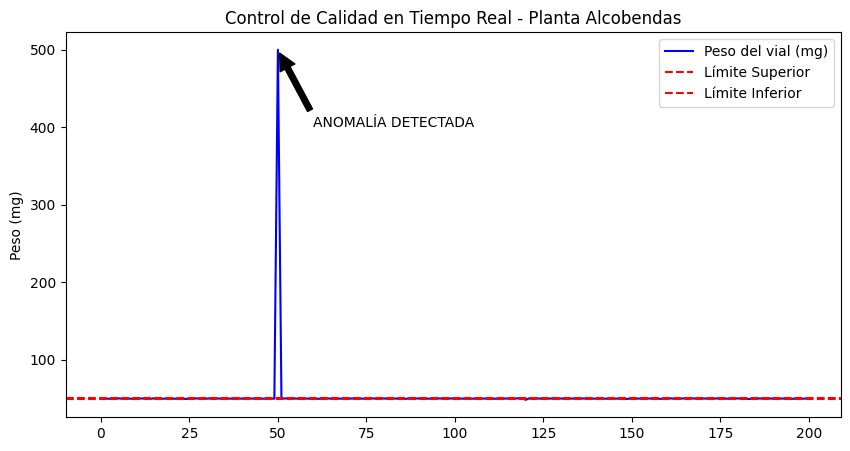

In [7]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

n_rows = 200
np.random.seed(42)


start_time = datetime(2026, 2, 10, 6, 0, 0)
timestamps = [start_time + timedelta(seconds=30*i) for i in range(n_rows)]


steps = ['Check_Tare', 'Fill_Vial', 'Capping', 'Labeling', 'Weight_Final']

data = {
    'Timestamp': timestamps,
    'Batch_ID': ['LOT-ALCO-2026-001'] * n_rows,
    'Step': np.random.choice(steps, n_rows),
    'Operator': np.random.choice(['OP_ES_01', 'OP_ES_02', 'OP_ES_03'], n_rows),
    # Simulamos el peso con media 50mg y desviación 0.2
    'Value_Measured': np.random.normal(50.0, 0.2, n_rows).round(4),
    'Unit': 'mg',
    'Critical_Alarm': np.random.choice([0, 0, 0, 0, 1], n_rows)
}

df = pd.DataFrame(data)

df.loc[50, 'Value_Measured'] = 500.00
df.loc[120, 'Value_Measured'] = 48.50

df.to_csv('MES_Production_Log.csv', index=False)